# Moment of Inertia Project
Saba Syed, Phys 191, 12/14/2020

# Theory


The moment of inertia, also known as rotational inertia, is a property of any object which can be rotated. It is a quantity that determines the torque (rotational equivalent of force) needed for a certain angular accleration on a rotational axis. The axis may be internal or external and may or may not be fixed but the moment of inertia is always specified with respect to that axis is defined as the sum of the prodycts obtained by multiplyinh the mass of each particlr of matter in a given body/object by the square if uts dustance from the axis. An object's moment of inertia depends on the axis of rotation and once that axis is determined, the moment of inertia can be calculated.

For a point mass, the moment of inertia is defined as the mass times the radiys from the axis squared:


$I=\sum_{i=0}^N m_i r_i^2$

#### Statement Problem: 
This problem explains how to calculate the particles in the sphere and are represented in the graph below.

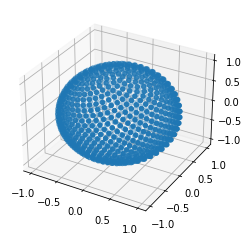

In [1]:
from numpy import pi, cos, sin, arccos, arange
import numpy as np
import mpl_toolkits.mplot3d
import matplotlib.pyplot as pp

num_pts = 1000
indices = arange(0, num_pts, dtype=float) + 0.5

phi = arccos(1 - 2*indices/num_pts)
theta = pi * (1 + 5**0.5) * indices

x, y, z = cos(theta) * sin(phi), sin(theta) * sin(phi), cos(phi);

pp.figure().add_subplot(111, projection='3d').scatter(x, y, z);
pp.show()

(0.15761900266148096, 0.0, 0.9875)
(-0.20003466815578327, 0.18324814197095035, 0.9625)
(0.030422864654604812, -0.3466528512881548, 0.9375)
(0.24889816401657275, 0.3246435798674898, 0.9125)
(-0.45376357088043356, -0.08026438651006922, 0.8875)
(0.4269883255396458, -0.27161502140502025, 0.8624999999999999)
(-0.14185748189247377, 0.5277027618187408, 0.8374999999999999)
(-0.26869090798331063, -0.5173479931024225, 0.8124999999999999)
(0.5789174776545258, 0.21141973433462127, 0.7874999999999999)
(-0.5980406811595557, 0.24686249953813344, 0.7624999999999998)
(0.2862431775730326, -0.611685044195862, 0.7374999999999998)
(0.20999914066425865, 0.6695103516154721, 0.7124999999999998)
(-0.6283028636861699, -0.36411435220787236, 0.6874999999999998)
(0.7315906236959353, -0.16083814634654564, 0.6624999999999998)
(-0.44310867303095114, 0.6302764900301693, 0.6374999999999997)
(-0.10158392048961576, -0.7839161033541534, 0.6124999999999997)
(0.6187724452345478, 0.52150207192154, 0.5874999999999997)
(-0.826

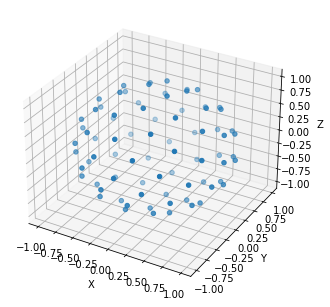

In [2]:
from math import cos, sin, pi, sqrt

def GetPointsEquiAngularlyDistancedOnSphere(numberOfPoints=45):
    
    dlong = pi*(3.0-sqrt(5.0))  #Around 2.39996323 
    dz   =  2.0/numberOfPoints
    long =  0.0
    z    =  1.0 - dz/2.0
    ptsOnSphere =[]
    for k in range( 0, numberOfPoints): 
        r    = sqrt(1.0-z*z)
        ptNew = (cos(long)*r, sin(long)*r, z)
        ptsOnSphere.append(ptNew)
        z    = z - dz
        long = long + dlong
    return ptsOnSphere

if __name__ == '__main__':                
    ptsOnSphere = GetPointsEquiAngularlyDistancedOnSphere(80)    

    #True/False to print them
    if( True ):    
        for pt in ptsOnSphere:  print(pt)

    #True/False to plot them
    if(True):
        from numpy import *
        import pylab as p
        import mpl_toolkits.mplot3d.axes3d as p3

        fig = p.figure()
        ax = p3.Axes3D(fig)

        x_s = []; y_s = []; z_s=[]

        for pt in ptsOnSphere:
            x_s.append(pt[0]); y_s.append( pt[1]); z_s.append( pt[2])

        ax.scatter3D(array(x_s), array(y_s), array(z_s))                
        ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
        p.show()

## Finding the perpendicular distance of a point from a line in 3D
The goal is to get a data file with coordinates of points, and a specified axis and find the moment of inertia of the distribution about that point. So, we need a code that will find the perpendicular distance of a point from a line. Please remember that the axis does not need to be along the x-axis or the y-axis. It could be any straight line. 
One way to solve this is as follows: The equation of a straight line in 3D is written as:
### $\frac{x - x_0}{l} = \frac{y - y_0}{m} = \frac{z - z_0}{n}$,
where, the quantities $(l, m, n)$ are known as direction-cosines. These are simply the cosine of the angles the line makes with the $x$, $y$, and the $z$ axis respectively. The point $(x_0, y_0, z_0)$ is one of the points on the straight line. Let us imagine there is a point in space $(X, Y, Z)$, and we want to find this point's perpendicular distance from the straight line. The distance $d$ of an arbitrary point $(x_1, y_1, z_1)$ on the straight line from this point in space is:
#### $(x_1 - X)^2 + (y_1 - Y)^2 + (z_1 - Z)^2 = d^2$.
Since, this arbitrary point $(x_1, y_1, z_1)$ is also on the straight line, it should satisfy the straight line equation. 
### $\frac{x_0 - x_1}{l} = \frac{y_0 - y_1}{m} = \frac{z_0 - z_1}{n} = p$,
where, $p$ is some quantity to which all these values must equate to.
From the above equation we can therefore write, $x_1 = x_0 - lp$, $y_1 = y_0 - mp$, and $z_1 = z_0 - np$. We now plug these back in the equation of distance:
#### $(x_0 - lp - X)^2 + (y_0 - mp - Y)^2 + (z_0 - np - Z)^2 = d^2$.
We want to find the minimum value of this distance, since perpendicular distance of a point from a line is also the shortest distance of the line to a point. Thus, we need to differentiate the above equation w.r.t $p$ and set that to zero. The resulting equation can be solved to find the value of $p$ for which the minima is reached. That value of $p$ can then be fed back to the equations $x_1 = x_0 - lp$, $y_1 = y_0 - mp$, and $z_1 = z_0 - np$ to find the point $(x_1, y_1, z_1)$ which is the required perpendicular point.

Lets compute the minimum distance:

$\frac{d}{dp}[(x_0 - lp - X)^2 + (y_0 - mp - Y)^2 + (z_0 - np - Z)^2] = 0\\$
$2(x_0 - lp - X)(-l) + 2(y_0 - mp - Y)(-m) + 2(z_0 - np - Z)(-n) = 0$

Rearranging the terms we get:

$(l^2 + m^2 + n^2)p = (lx_0  + my_0 + nz_0) - (lX  + mY + nZ)$

Note that $l^2 + m^2 + n^2 = 1$. Therefore, the above equation becomes:
#### $p = (lx_0  + my_0 + nz_0) - (lX  + mY + nZ)$



If the line from which we are finding the the distance is the $z$-axis, Then $l=0, m=0, n=1$. Furthermore since the axis passes through the origin, therefore we can choose $x_0=0, y_0=0, z_0=0$. Then, for the $(x_1, y_1, z_1)$ to be the shortest distance from the point $(X, Y, Z)$, we must have:
#### $p = -Z$

Which will mean: $x_1 = 0, y_1 = 0, z_1 = 0 - (-Z) = Z$, implying $D=\sqrt{(0-X)^2 + (0-Y)^2 + (Z-Z)^2} = \sqrt{X^2 + Y^2}$.

#### Statment Problem:
The following problem asked us to find the perpendicular distance of a point from a line in space. The function, which is written as a code, and computes the perpendicular distance of a point in space from line. The cartesian coordinates of each point, were provided with the direction cosines of a line and one point on the line. The direction cosines were represented with the letters l, m, and n. 

The parameters which were used, were the following P, dc and Q. P represented a tuple, from where the X, Y and Z coordinates were coordinates of a point, which had their perpendicular distance being calculated. dc represented the direction cosines of a line, which had their perpendicular distance being calculated. Q represented a tupe, where x0, y0, and z0 were the coordinates of each point on the line. 
The perpendicular distance of one point from the line, was given the following coordinates.

For Q, x0 had a value of 0. For Q, y0 had a value of 1. For Q, z0 had a value of 2. 

For P, X had a value of 0. For P, Y had a value of 1. For P, Z had a value of 2.
The values for x1, y1, and z1 were calculated with the following formulas. The value of x1 was calculated by the following formula: $x_{\rm 1}$ = $x_{\rm 0} - (l*p)$ .


For dc, l had a value of 0. For dc, m had a value of 1. For dc, n had a value of 2.

The value of P, which is the perpendicular distance of a point from a line in space, was calculated by the following formula: $p = (l* x_{\rm 0}$ + $m* y_{\rm 0}$ + $n* z_{\rm 0}$ - $(l*X + m*Y + n*Z)$

The values of x1, y1, and z1 were calculated with the following formulas. 

The value of x1 was calculated by the following formula: $x_{\rm 1}$ = $x_{\rm 0} - (l*p)$.

The value of y1 was calculated by the following formula: $y_{\rm 1}$ = $y_{\rm 0} - (m*p)$.

The value of z1 was calculated by the following formula: $z_{\rm 1}$= $z_{\rm 0} - (n*p)$.


The perpendicular distance of a point from a line in space, was calculated with the following formula: 
$D$ = $(x_{\rm 1}$  - $X) ** 2 + (y_{\rm 1}$ - $Y) ** 2 + (z_{\rm 1}$ - $Z) ** 2) **0.5$.

That same formula was used to calculate the distance from the z axis. All same three values, which consisted of 3, 4 and 3 were used to calculate the distance for all three axes, x, y and z. The z axis represented the Q, and it had value of 1. P and dc had values of 0 and 0. When the distance from the z axis was calculated, the value was 5.0.

The x axis represented the P, and it had a value of 1. dc and Q had values of 0 and 0. When the distance from the x axis was calculated, the value was 5.0.

The y axis represented the dc, and it had a value of 1. P and Q had values of 0 and 0. When the distance from the y axis was calculated, it resulted in a long decimal number, as the value started with 4.24. 

The last function which was used, it was computemomentofinertia(spherical_distribution_1M, dc, Q). The function used the text file which contained the data of the coordinates of the point masses, the direction of cosine of the axis for which it needed the moment of inertia to be calculated, and one point of thay axis. This function was returning the value of the moment of inertia, because it had assumed that every point from the data file had the same unity mass. 

For X, P had a value of 0. 

For Y, P had a value of 1. 

For Z, P had a value of 2.

The direction cosines of a line (dc), which were represented with the letters l, m and n, had values of 0, 0 and 1. The square root taken from the radius, gave a value of 0. The perpendicular distance for the X, Y and Z coordinates, and the direction cosines of a line (dc), resulted in all the values for Q, which had coordinates x0, y0 and z0, to have values of 0, 0 and 0. 

The squared radius was calculated with the following formula: $Dsq += (D**2)$.

The radius which was given to calculate the moment of inertia was 1, the mass was one 1000000. The moment of inertia was calculated with the following formula: $I = \frac{2}{5} * (M*(r**2))$.

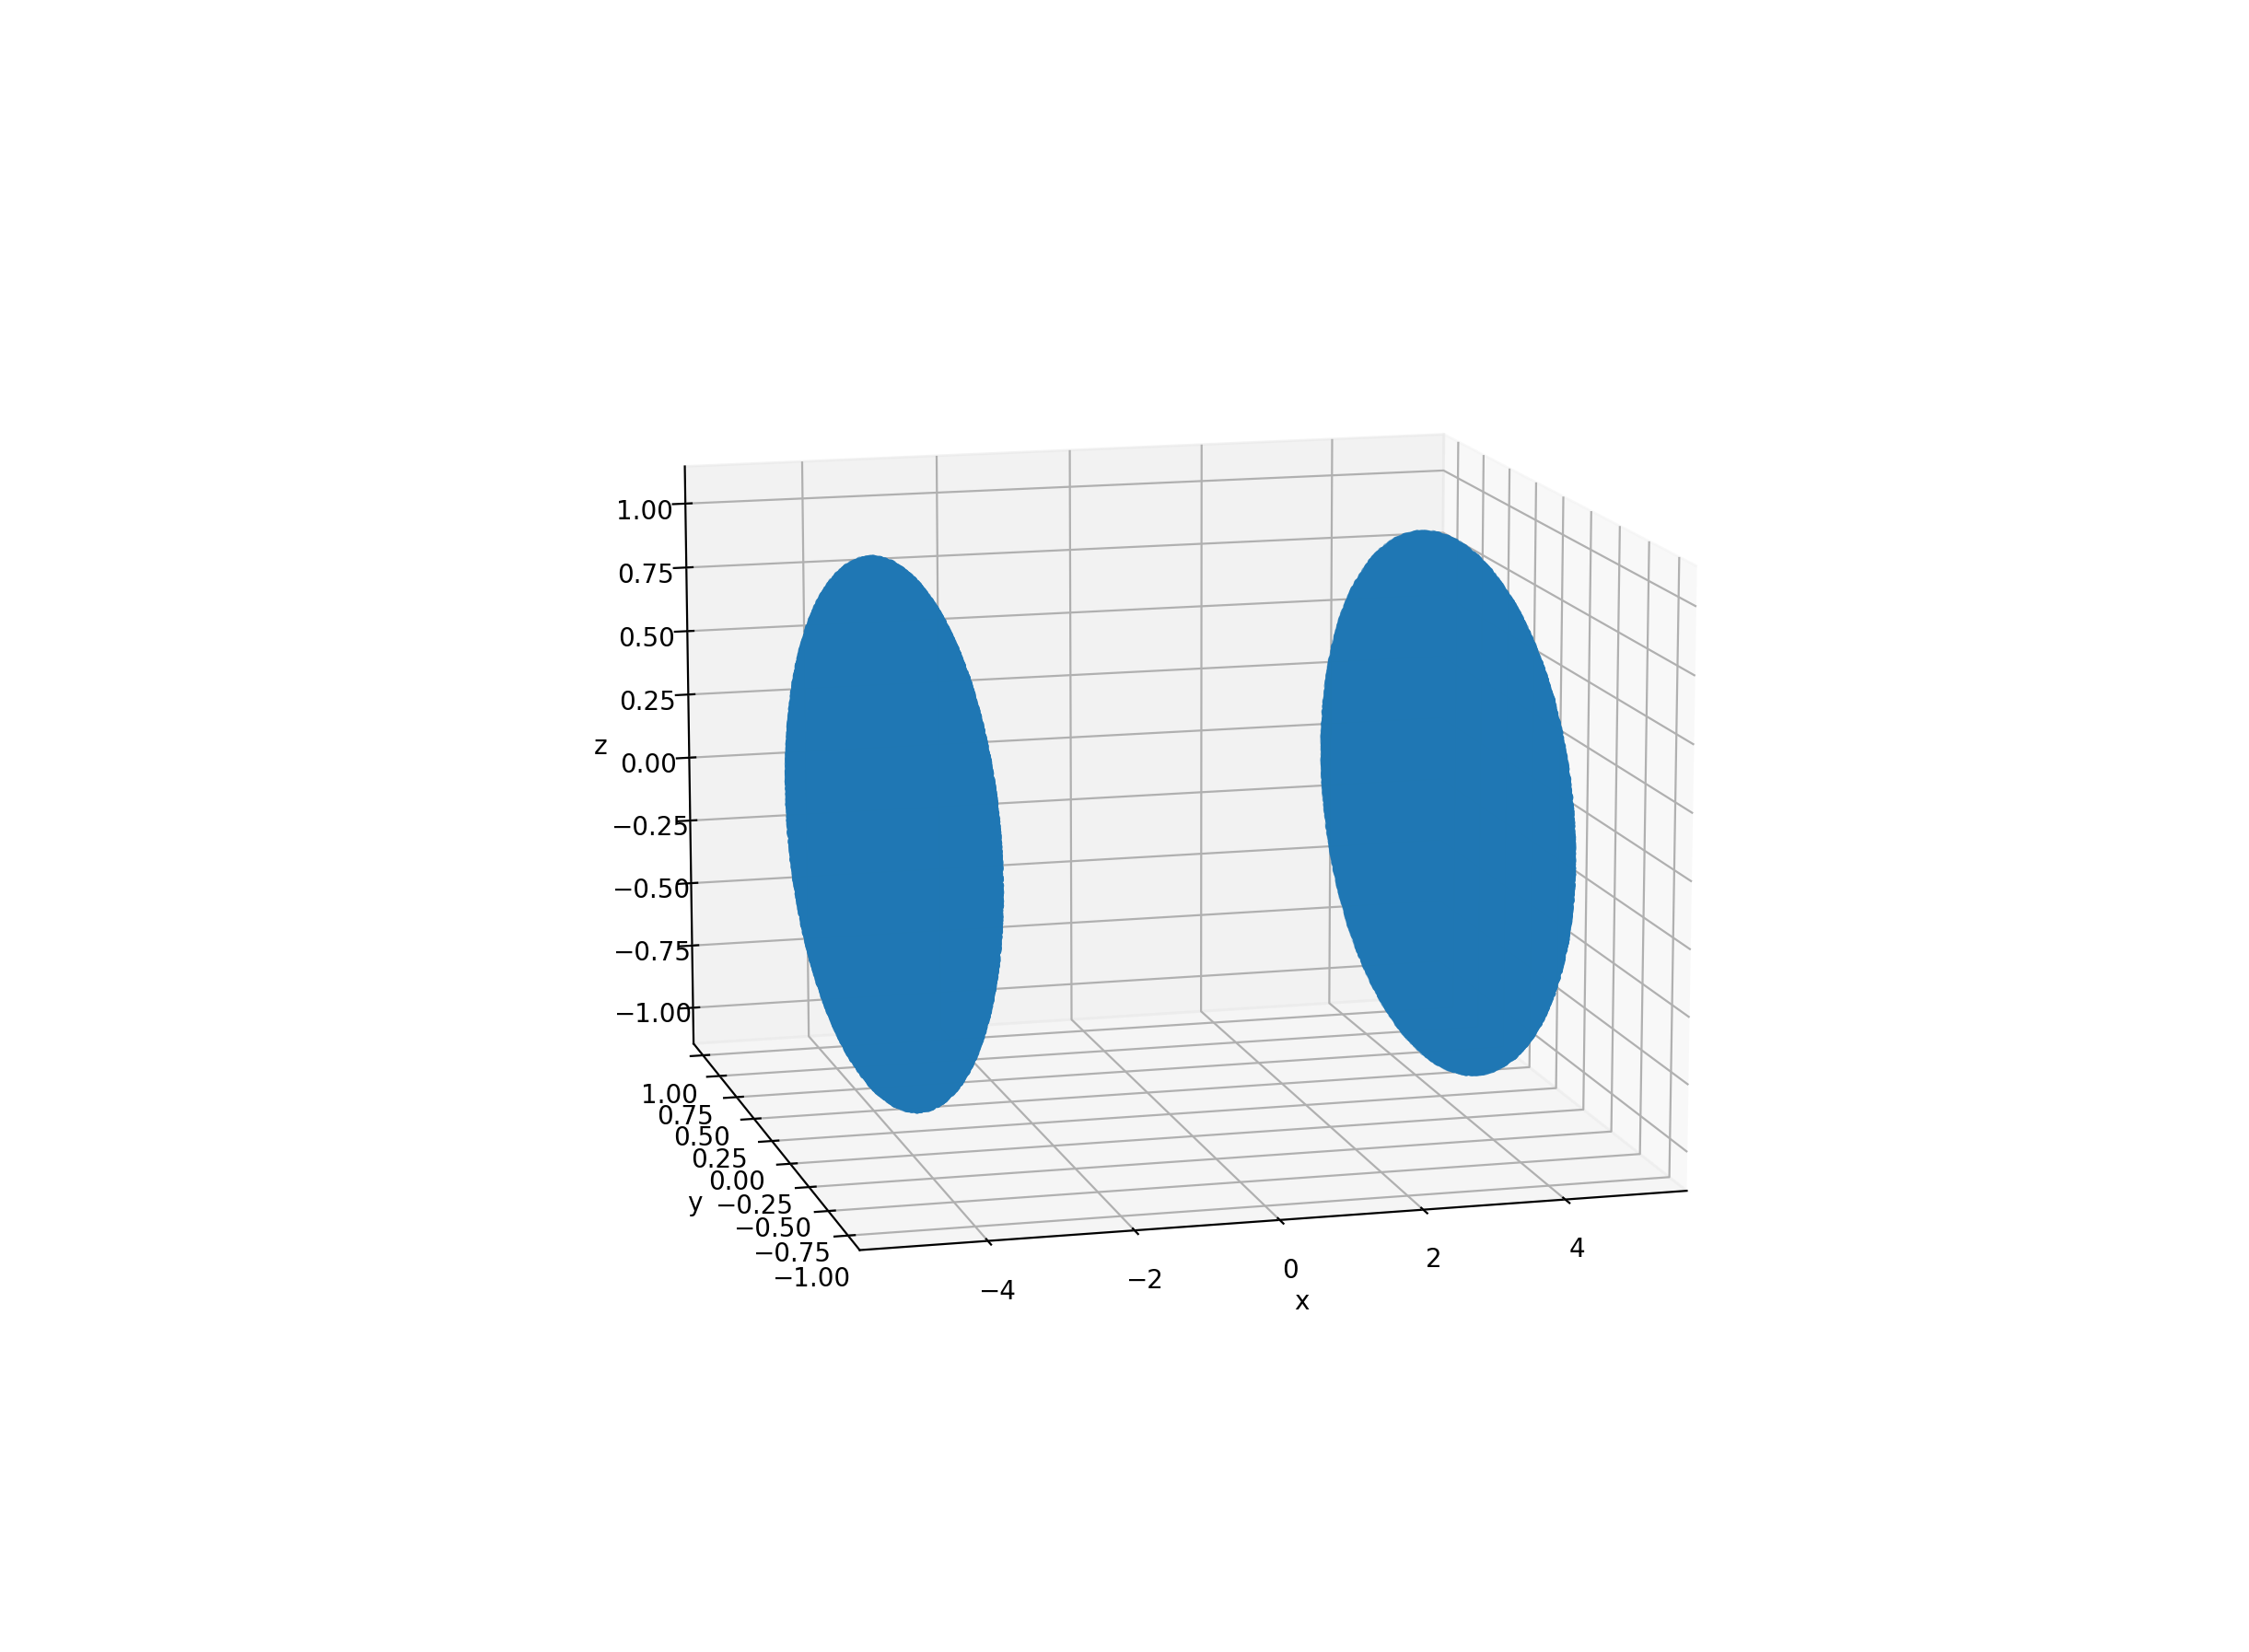

In [3]:
from IPython.display import Image
Image('dumbbell_distribution_figure.png', width=1000, height=1000)

In [4]:
def getnormaldist(P, dc, Q=(0, 0, 0)):
    
    """This function computes the perpendicular distance of a point in space from
    a line. The cartesian coordinates of the point needs to be supplied along with
    the direction cosines (l, m, n) of the line and one point on the line.
    PARAMETERS:
    -----------
    P = A tuple, where X, Y, and Z are either coordinates of the point whose perpendicular 
        distance is being calculated.
    dc = The direction cosines of the line on which the perpendicular distance is being 
         calculated.
    Q = A tupe, where x0, y0, and z0 are the coordinates of one of the points on the 
        line. (Default is the origin)
    RETURNS:
    --------
    The perpendicular distance of the point from the line.
    """
    
    
    x0 = Q[0]
    y0 = Q[1]
    z0 = Q[2]

    X = P[0]
    Y = P[1]
    Z = P[2]
    
    l = dc[0]
    m = dc[1]
    n = dc[2]
    
    
    if round(l**2 + m**2 + n**2, 4) != 1:
        print("Illegal combination of l, m, and n")
        return np.nan
    
    
    p = (l*x0 + m*y0 + n*z0) - (l*X + m*Y + n*Z)

    x1 = x0 - l*p
    y1 = y0 - m*p
    z1 = z0 - n*p 

    D = ((x1 - X)**2 + (y1 - Y)**2 + (z1 - Z)**2)**0.5
    
    
    
    return D

In [5]:
print('This is the distance from the z-axis: ')
print(getnormaldist((3, 4, 3), (0, 0, 1)))

This is the distance from the z-axis: 
5.0


In [6]:
print('This is the distance from the x-axis: ')
print(getnormaldist((3, 4, 3), (1, 0, 0)))

This is the distance from the x-axis: 
5.0


In [7]:
print('This is the distance from the y-axis: ')
print(getnormaldist((3, 4, 3), (0, 1, 0)))

This is the distance from the y-axis: 
4.242640687119285


In [8]:
print('The distance with and axis that is a 45 degree line on the yz plane: ')
print(getnormaldist((3, 4, 3), (0, 1/sqrt(2), 1/sqrt(2))))

The distance with and axis that is a 45 degree line on the yz plane: 
3.082207001484488


#### Evenly distributed points on a plane:

They are not really defined and only the five platonic solids can qualify. Each node has the same number of neighbors,at the same distance and equally spaced around itself. 
The purpose is to prevent putting a higher number of nodes in one region than in another. This can be put in a number of ways such as packing, covering, or elctrostatic reuplusion. packing is maximizing the smallest distance between nodes, covering is minimizing the greatest distance of any point from the nearest node and electrostatic repulsion is when the nodes are seen as charged particles. 

Out of the three versions electrostatic repulsion is the easiest to implement. It is also known as the electron problem or the Thomson problem. So beginning from the arbitrary distribution you can use algorithms or port repulsion where all the nose are repeal each other according to a certain force law and dynamics are simulated. The algorithm is run until a criteria is satisfied and the resulting distribution is approximate. 

In [9]:
def computemomentofinertia(dumbbell_distribution, dc, Q):
    '''This function takes as input the name of the text file that contains the
    data of the coordinates of the point masses, the direction cosine of the axis
    around which the moment of ineratia needs to be calculated, and one point on
    that axis. The function returns the value of the moment of ineratia assuming 
    that each point in the data file has same unity mass.
    PARAMETERS:
    -----------
    text_filename = Name of the text file. Should have three columns, the columns
                    being the x, y, and the z-coordinates of each points.
    dc = tuple (l, m, n) direction cosine of the axis of rotation.
    Q = tuple (x0, y0, z0), coordinates of one arbitrary point on the axis.
    RETURNS:
    -------
    Moment of inertia of the system assuming that all points have unity mass.
    '''
P = np.loadtxt('dumbbell_distribution.txt', unpack=True)
    
X = P[0]
Y = P[1]
Z = P[2]

In [10]:
P 

array([[ 3.647289,  3.707514,  4.001947, ..., -4.611004, -4.355666,
        -3.406552],
       [ 0.76043 ,  0.753671, -0.382584, ...,  0.123403,  0.10649 ,
         0.015106],
       [ 0.309818,  0.416071, -0.494952, ...,  0.670879,  0.618518,
         0.253952]])

In [11]:
dc = (0, 0, 1)
Dsq = 0
for X, Y, Z in zip(P[0], P[1], P[2]):
    D = getnormaldist((X, Y, Z), dc, Q=(0, 0, 0))
    Dsq += (D**2)
print('This is the radius squared:')
print(Dsq)

This is the radius squared:
32796101.08096573


In [12]:
P.shape

(3, 2000000)

In [13]:
r = 1
M = 1000000
I = (2/5)*(M*(r**2))
print(I)

400000.0
